# LabelEncoder

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
y = np.array([
    'Chat',
    'Chien',
    'Chat',
    'Oiseau'
])

In [5]:
transformer = LabelEncoder()
transformer.fit(y)

LabelEncoder()

In [7]:
transformer.transform(y)

array([0, 1, 0, 2])

In [9]:
 transformer.inverse_transform(np.array([0,1,0,2]))

array(['Chat', 'Chien', 'Chat', 'Oiseau'], dtype='<U6')

# Ordinal Encoder

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [14]:
X = np.array([
    ['Chat', 'Poils'],
    ['Chien', 'Poils'],
    ['Chat', 'Poils'],
    ['Oiseau', 'Plumes'],
])

In [16]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

# LabelBinarizer

In [23]:
from sklearn.preprocessing import LabelBinarizer

In [25]:
y = np.array([
    'Chat',
    'Chien',
    'Chat',
    'Oiseau'
])

In [31]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

# OneHotEncoder

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
X = np.array([
    ['Chat', 'Poils'],
    ['Chien', 'Poils'],
    ['Chat', 'Poils'],
    ['Oiseau', 'Plumes'],
])

In [41]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# MinMaxScaler

In [67]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [68]:
X = np.array([
    [70],
    [80],
    [120]])

In [71]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [73]:
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

In [75]:
from sklearn.datasets import load_iris 

C:\Users\hp\AppData\Local\Temp\ipykernel_16156\596825306.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


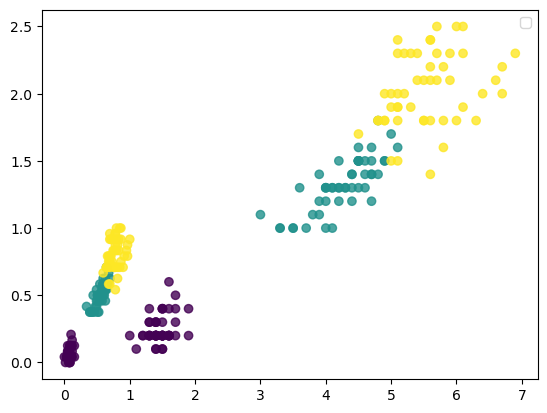

In [89]:
iris = load_iris()

X = iris.data
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:,2],X[:,3], c=y, alpha=0.8)
plt.scatter(X_minmax[:,2],X_minmax[:,3], c=y, alpha=0.8)
plt.legend()
plt.show()

# Standardisation 

In [93]:
from sklearn.preprocessing import StandardScaler

In [95]:
X = np.array([
    [70],
    [80],
    [120]])

In [97]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

C:\Users\hp\AppData\Local\Temp\ipykernel_16156\720659347.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


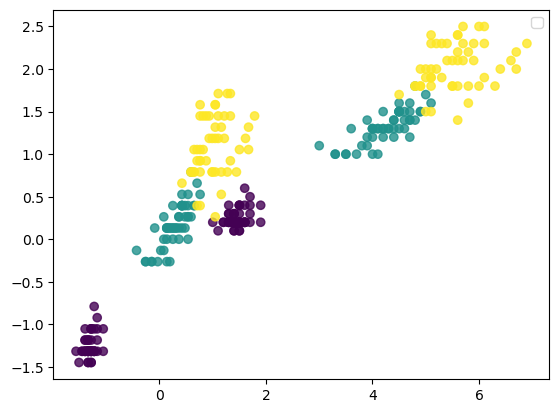

In [99]:
iris = load_iris()

X = iris.data
X_stds = StandardScaler().fit_transform(X)

plt.scatter(X[:,2],X[:,3], c=y, alpha=0.8)
plt.scatter(X_stds[:,2],X_stds[:,3], c=y, alpha=0.8)
plt.legend()
plt.show()

# Robust scale

In [128]:
from sklearn.preprocessing import RobustScaler

C:\Users\hp\AppData\Local\Temp\ipykernel_16156\3270000682.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


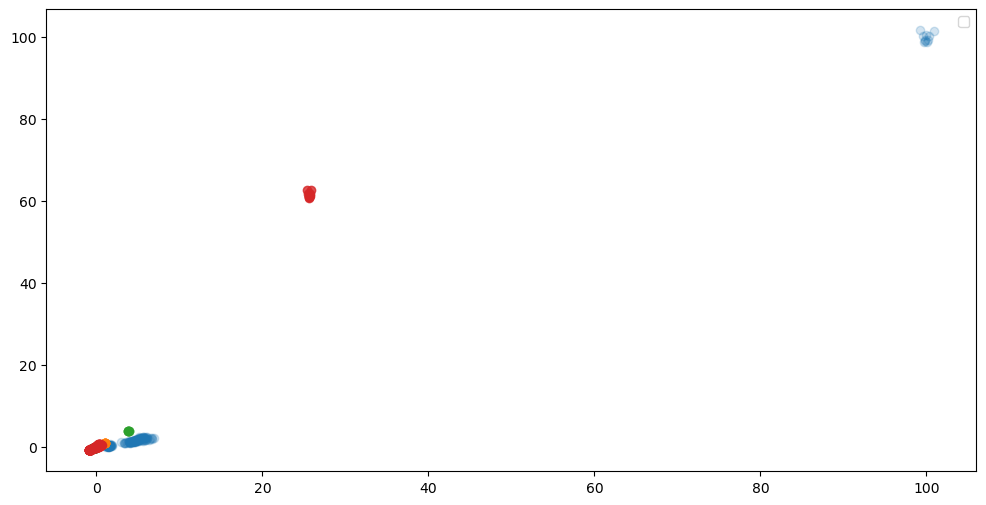

In [134]:
iris = load_iris()

X = iris.data
outliers  = np.full((10,4),100)+np.random.randn(10,4)
X = np.vstack((X, outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_stds = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.figure(figsize=(12,6))
plt.scatter(X[:,2],X[:,3], alpha=0.2)
plt.scatter(X_minmax[:,2],X_minmax[:,3], alpha=0.5)
plt.scatter(X_stds[:,2],X_stds[:,3],  alpha=0.4)
plt.scatter(X_robust[:,2],X_robust[:,3],  alpha=0.8)

plt.legend()
plt.show()

# PolynomialFeatures

In [146]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [148]:
X = np.array([
    [1],
    [2],
    [0.5]])

In [150]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

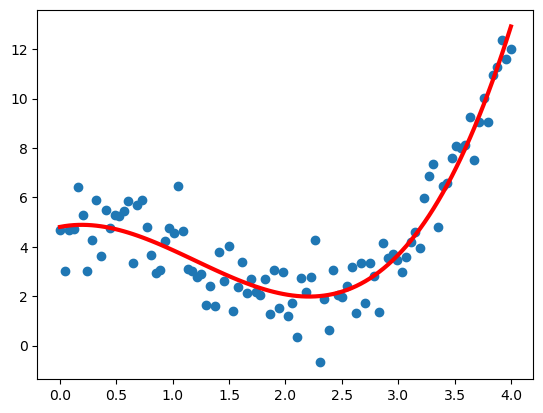

In [158]:
X = np.linspace(0,4,100).reshape((100,1))
y = X**2 + 5*np.cos(X) + np.random.randn(100,1)

plt.scatter(X, y)

X_poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred, c="r", lw=3)

# PowerTransformer

In [162]:
from sklearn.preprocessing import PowerTransformer

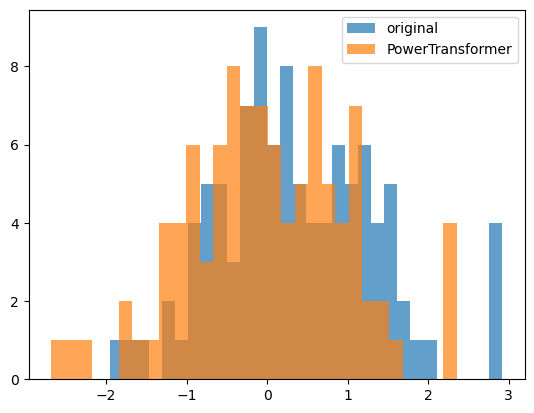

In [166]:
np.random.seed(0)
X= np.random.rand(100,2) + np.random.randn(100,2)
X2 = PowerTransformer().fit_transform(X)

plt.hist(X[:,0], bins=30, alpha=0.7, label='original')
plt.hist(X2[:,0], bins=30, alpha=0.7, label='PowerTransformer')
plt.legend()
plt.show()

# Discretisation

In [174]:
from sklearn.preprocessing import Binarizer , KBinsDiscretizer

In [176]:
X = np.linspace(0,5,10).reshape((10,1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [178]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [182]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# Personnalisation

In [185]:
from sklearn.preprocessing import FunctionTransformer

In [187]:
X = np.linspace(1,5,10).reshape((-1,1))

In [189]:
Mon_transformer = FunctionTransformer(func = np.log1p, inverse_func= np.expm1)

In [191]:
Mon_transformer.fit_transform(X)

array([[0.69314718],
       [0.89381788],
       [1.06087196],
       [1.2039728 ],
       [1.32913595],
       [1.44036158],
       [1.54044504],
       [1.63141682],
       [1.71479843],
       [1.79175947]])

# Transformer Estimator

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [196]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [198]:
# Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

#  Test 
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

# Pipeline

In [203]:
from sklearn.pipeline import make_pipeline

In [205]:
model = make_pipeline(StandardScaler(), SGDClassifier())
model.fit(X_train, y_train)
model.predict(X_test)

array([2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

# GridSearchCV

In [211]:
from sklearn.model_selection import GridSearchCV

In [215]:
model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [229]:
params = {
    'polynomialfeatures__degree' : [2,3,4],
    'sgdclassifier__penalty': ['l1','l2']
}


In [231]:
grid = GridSearchCV(model, param_grid=params, cv=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [233]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'sgdclassifier__penalty': 'l1'}

In [235]:
grid.score(X_test, y_test)

0.9473684210526315

# Application

In [240]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [242]:
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6842105263157895